In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df_test=pd.read_csv('test.csv')
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [4]:
df.shape

(55423856, 8)

In [5]:
df_test.shape

(9914, 7)

In [6]:
#check for NA values in train set
df.isnull().any()
print(df.isnull().any())

key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude     True
dropoff_latitude      True
passenger_count      False
dtype: bool


In [7]:
#check for NA values in test set
df_test.isnull().any()
print(df_test.isnull().any())

key                  False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
dtype: bool


In [8]:
#removing NA values
df=df.dropna(axis=0)
df.shape

(55423480, 8)

In [9]:
#after removing NA values checking again
df.isnull().any()
print(df.isnull().any())

key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
dtype: bool


In [10]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542348e+07,5.542348e+07,5.542348e+07,5.542348e+07,5.542348e+07,5.542348e+07
mean,1.134500e+01,-7.250973e+01,3.991982e+01,-7.251121e+01,3.992068e+01,1.685391e+00
std,2.071087e+01,1.284878e+01,9.642324e+00,1.278220e+01,9.633346e+00,1.327662e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55423480 entries, 0 to 55423855
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.7+ GB


In [12]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [14]:
# remove where pickup and drop location are same
print(df[(df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude'])].shape)
df=df[~((df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude']))]

(1581276, 8)


In [15]:
df.shape

(53842204, 8)

In [16]:
#boundary for new york latitude longitude...

boundary={"min_lat":40.573143,
         "min_lang":-74.252193,
         "max_lat":41.709555,
         "max_lang":-72.986532}

In [17]:
print(df[(df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang'])].shape[0])
print(df[(df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang'])].shape[0])

97467
101033
99247
97827


In [18]:
df=df[~((df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat']))]
df=df[~((df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang']))]

df=df[~((df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat']))]
df=df[~((df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang']))]

df.shape

(53662868, 8)

In [19]:
#Randomly select 10% data 

df = df.sample(frac=0.1)
df.shape

(5366287, 8)

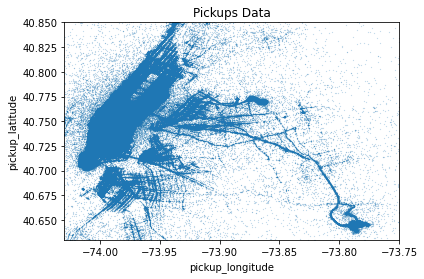

In [20]:
df.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Pickups Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

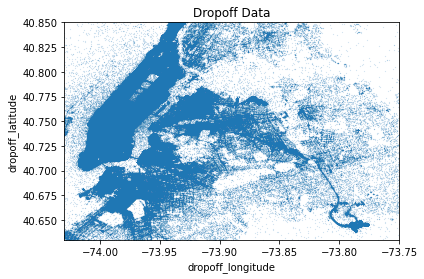

In [21]:
df.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.5,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Dropoff Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [22]:
df['passenger_count'].value_counts()

1      3711947
2       792877
5       379206
3       235947
6       113793
4       113539
0        18972
208          2
9            2
7            1
8            1
Name: passenger_count, dtype: int64

In [23]:
df['passenger_count']=df['passenger_count'].astype(int)
print(df['passenger_count'].max())
print(df['passenger_count'].min())

208
0


In [24]:
df=df[~((df['passenger_count']>6) | (df['passenger_count'] == 0))]
df.shape

(5347309, 8)

<AxesSubplot:xlabel='count', ylabel='passenger_count'>

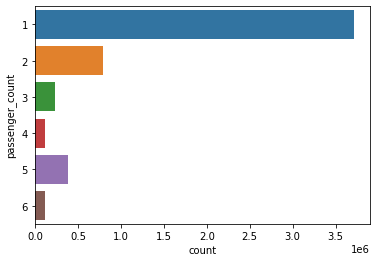

In [25]:
sns.countplot(y='passenger_count',data=df)

In [26]:
df[df['fare_amount']<=0]['fare_amount'].count()
df=df[~(df['fare_amount']<=0)]

In [27]:
df['pickup_day']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.day
df['pickup_month']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.month
df['pickup_year']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.year

In [28]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year
37253610,2010-06-10 11:19:19.0000002,7.7,2010-06-10 11:19:19 UTC,-73.979835,40.755001,-73.994422,40.732855,1,10,6,2010
14091441,2010-05-17 08:53:00.00000039,5.7,2010-05-17 08:53:00 UTC,-73.989782,40.762450,-73.990642,40.750733,2,17,5,2010
36223331,2012-12-16 09:46:00.00000068,4.5,2012-12-16 09:46:00 UTC,-73.949012,40.770863,-73.960522,40.768825,5,16,12,2012
23390400,2013-03-09 11:34:56.0000002,15.0,2013-03-09 11:34:56 UTC,-73.990592,40.756421,-74.002176,40.719030,1,9,3,2013
43071060,2010-05-16 11:14:00.000000168,12.9,2010-05-16 11:14:00 UTC,-74.000297,40.762015,-73.948212,40.771448,1,16,5,2010


In [29]:
df['pickup_weekday'] = pd.DatetimeIndex(df.pickup_datetime).dayofweek

In [30]:
df['pickup_hour'] = pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.hour
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour
37253610,2010-06-10 11:19:19.0000002,7.7,2010-06-10 11:19:19 UTC,-73.979835,40.755001,-73.994422,40.732855,1,10,6,2010,3,11
14091441,2010-05-17 08:53:00.00000039,5.7,2010-05-17 08:53:00 UTC,-73.989782,40.762450,-73.990642,40.750733,2,17,5,2010,0,8
36223331,2012-12-16 09:46:00.00000068,4.5,2012-12-16 09:46:00 UTC,-73.949012,40.770863,-73.960522,40.768825,5,16,12,2012,6,9
23390400,2013-03-09 11:34:56.0000002,15.0,2013-03-09 11:34:56 UTC,-73.990592,40.756421,-74.002176,40.719030,1,9,3,2013,5,11
43071060,2010-05-16 11:14:00.000000168,12.9,2010-05-16 11:14:00 UTC,-74.000297,40.762015,-73.948212,40.771448,1,16,5,2010,6,11


In [31]:
df['mid_night_trip']=((df['pickup_hour']>23) | (df['pickup_hour']<6)).astype(int)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip
37253610,2010-06-10 11:19:19.0000002,7.7,2010-06-10 11:19:19 UTC,-73.979835,40.755001,-73.994422,40.732855,1,10,6,2010,3,11,0
14091441,2010-05-17 08:53:00.00000039,5.7,2010-05-17 08:53:00 UTC,-73.989782,40.762450,-73.990642,40.750733,2,17,5,2010,0,8,0
36223331,2012-12-16 09:46:00.00000068,4.5,2012-12-16 09:46:00 UTC,-73.949012,40.770863,-73.960522,40.768825,5,16,12,2012,6,9,0
23390400,2013-03-09 11:34:56.0000002,15.0,2013-03-09 11:34:56 UTC,-73.990592,40.756421,-74.002176,40.719030,1,9,3,2013,5,11,0
43071060,2010-05-16 11:14:00.000000168,12.9,2010-05-16 11:14:00 UTC,-74.000297,40.762015,-73.948212,40.771448,1,16,5,2010,6,11,0


In [32]:
df['rush_hour_trip']=((df['pickup_hour']>=16) & (df['pickup_hour']<=20)).astype(int)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip
37253610,2010-06-10 11:19:19.0000002,7.7,2010-06-10 11:19:19 UTC,-73.979835,40.755001,-73.994422,40.732855,1,10,6,2010,3,11,0,0
14091441,2010-05-17 08:53:00.00000039,5.7,2010-05-17 08:53:00 UTC,-73.989782,40.762450,-73.990642,40.750733,2,17,5,2010,0,8,0,0
36223331,2012-12-16 09:46:00.00000068,4.5,2012-12-16 09:46:00 UTC,-73.949012,40.770863,-73.960522,40.768825,5,16,12,2012,6,9,0,0
23390400,2013-03-09 11:34:56.0000002,15.0,2013-03-09 11:34:56 UTC,-73.990592,40.756421,-74.002176,40.719030,1,9,3,2013,5,11,0,0
43071060,2010-05-16 11:14:00.000000168,12.9,2010-05-16 11:14:00 UTC,-74.000297,40.762015,-73.948212,40.771448,1,16,5,2010,6,11,0,0


In [33]:
df['snow_season']=((df['pickup_month']==1) | (df['pickup_month']==2)).astype(int)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip,snow_season
37253610,2010-06-10 11:19:19.0000002,7.7,2010-06-10 11:19:19 UTC,-73.979835,40.755001,-73.994422,40.732855,1,10,6,2010,3,11,0,0,0
14091441,2010-05-17 08:53:00.00000039,5.7,2010-05-17 08:53:00 UTC,-73.989782,40.762450,-73.990642,40.750733,2,17,5,2010,0,8,0,0,0
36223331,2012-12-16 09:46:00.00000068,4.5,2012-12-16 09:46:00 UTC,-73.949012,40.770863,-73.960522,40.768825,5,16,12,2012,6,9,0,0,0
23390400,2013-03-09 11:34:56.0000002,15.0,2013-03-09 11:34:56 UTC,-73.990592,40.756421,-74.002176,40.719030,1,9,3,2013,5,11,0,0,0
43071060,2010-05-16 11:14:00.000000168,12.9,2010-05-16 11:14:00 UTC,-74.000297,40.762015,-73.948212,40.771448,1,16,5,2010,6,11,0,0,0


In [34]:
!pip install geopy

In [35]:
from geopy.distance import geodesic

def distance_calculate(lat,long,drop_lat,drop_long):    
    newport_ri = (lat,long)
    cleveland_oh = (drop_lat,drop_long)
    dist=geodesic(newport_ri, cleveland_oh).km
    return dist

In [36]:
df['trip_distance']=list(map(distance_calculate,df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude']))
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip,snow_season,trip_distance
37253610,2010-06-10 11:19:19.0000002,7.7,2010-06-10 11:19:19 UTC,-73.979835,40.755001,-73.994422,40.732855,1,10,6,2010,3,11,0,0,0,2.750632
14091441,2010-05-17 08:53:00.00000039,5.7,2010-05-17 08:53:00 UTC,-73.989782,40.762450,-73.990642,40.750733,2,17,5,2010,0,8,0,0,0,1.303189
36223331,2012-12-16 09:46:00.00000068,4.5,2012-12-16 09:46:00 UTC,-73.949012,40.770863,-73.960522,40.768825,5,16,12,2012,6,9,0,0,0,0.997763
23390400,2013-03-09 11:34:56.0000002,15.0,2013-03-09 11:34:56 UTC,-73.990592,40.756421,-74.002176,40.719030,1,9,3,2013,5,11,0,0,0,4.265959
43071060,2010-05-16 11:14:00.000000168,12.9,2010-05-16 11:14:00 UTC,-74.000297,40.762015,-73.948212,40.771448,1,16,5,2010,6,11,0,0,0,4.520636


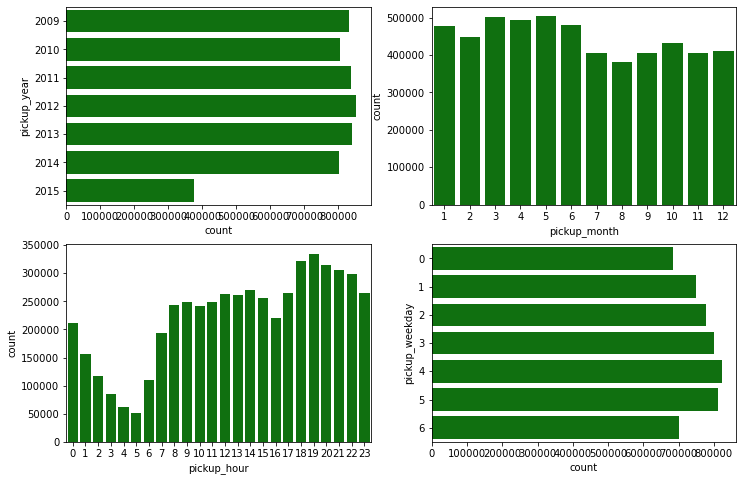

In [37]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(y='pickup_year', data=df, color='g')
plt.subplot(2,2,2)
sns.countplot(x='pickup_month', data=df, color='g')
plt.subplot(2,2,3)
sns.countplot(x='pickup_hour', data=df, color='g')
plt.subplot(2,2,4)
sns.countplot(y='pickup_weekday', data=df, color='g')

plt.show()

<AxesSubplot:xlabel='fare_amount', ylabel='trip_distance'>

<Figure size 576x576 with 0 Axes>

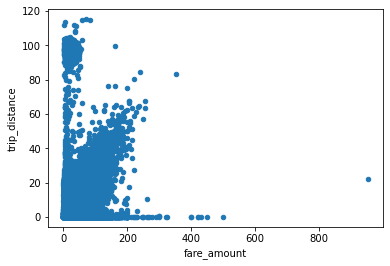

In [38]:
plt.figure(figsize=(8,8))

df.plot(x='fare_amount',y='trip_distance',kind='scatter')

<AxesSubplot:>

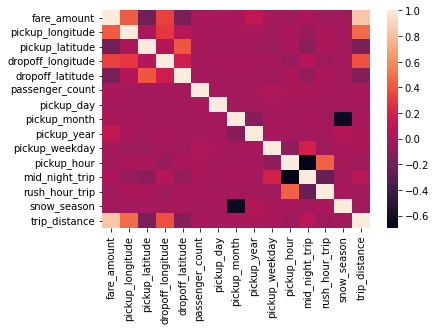

In [39]:
sns.heatmap(df.corr())

In [40]:
df=df.drop('pickup_datetime',axis=1)
df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip,snow_season,trip_distance
37253610,2010-06-10 11:19:19.0000002,7.7,-73.979835,40.755001,-73.994422,40.732855,1,10,6,2010,3,11,0,0,0,2.750632
14091441,2010-05-17 08:53:00.00000039,5.7,-73.989782,40.762450,-73.990642,40.750733,2,17,5,2010,0,8,0,0,0,1.303189
36223331,2012-12-16 09:46:00.00000068,4.5,-73.949012,40.770863,-73.960522,40.768825,5,16,12,2012,6,9,0,0,0,0.997763
23390400,2013-03-09 11:34:56.0000002,15.0,-73.990592,40.756421,-74.002176,40.719030,1,9,3,2013,5,11,0,0,0,4.265959
43071060,2010-05-16 11:14:00.000000168,12.9,-74.000297,40.762015,-73.948212,40.771448,1,16,5,2010,6,11,0,0,0,4.520636


In [41]:
df_test['pickup_day']=pd.to_datetime(df_test.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.day
df_test['pickup_month']=pd.to_datetime(df_test.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.month
df_test['pickup_year']=pd.to_datetime(df_test.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.year

df_test['pickup_weekday'] = pd.DatetimeIndex(df_test.pickup_datetime).dayofweek
df_test['pickup_hour']=pd.to_datetime(df_test.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.hour

df_test['mid_night_trip']=((df_test['pickup_hour']>23) | (df_test['pickup_hour']<6)).astype(int)
df_test['rush_hour_trip']=((df_test['pickup_hour']>=16) & (df_test['pickup_hour']<=20)).astype(int)
df_test['snow_season']=((df_test['pickup_month']==1) | (df_test['pickup_month']==2)).astype(int)
df_test['trip_distance']=list(map(distance_calculate,df_test['pickup_latitude'],df_test['pickup_longitude'],df_test['dropoff_latitude'],df_test['dropoff_longitude']))

df_test=df_test.drop(columns=['pickup_datetime','key'])
df_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip,snow_season,trip_distance
0,-73.973320,40.763805,-73.981430,40.743835,1,27,1,2015,1,13,0,0,1,2.320991
1,-73.986862,40.719383,-73.998886,40.739201,1,27,1,2015,1,13,0,0,1,2.423802
2,-73.982524,40.751260,-73.979654,40.746139,1,8,10,2011,5,11,0,0,0,0.618182
3,-73.981160,40.767807,-73.990448,40.751635,1,1,12,2012,5,21,0,0,0,1.959671
4,-73.966046,40.789775,-73.988565,40.744427,1,1,12,2012,5,21,0,0,0,5.382833


In [42]:
X=df.drop(columns=['key','fare_amount'])
y=df['fare_amount']

Linear Regression

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(X_train,y_train)

LinearRegression()

In [48]:
lm.coef_

array([ 9.86550468e+00, -1.91090591e+01,  5.92467694e+00, -1.54425485e+01,
        4.70355066e-02,  1.07165810e-03,  7.75596483e-02,  5.41834279e-01,
       -2.42661487e-02, -5.42120529e-02, -1.68152960e+00,  1.83233520e-01,
        4.38976054e-02,  2.03525623e+00])

In [49]:
lm.intercept_

1490.9273039522484

In [50]:
prediction = lm.predict(X_test)

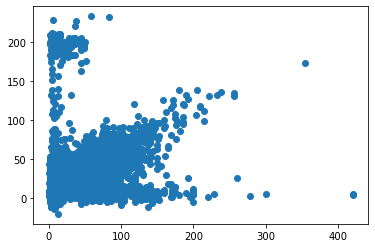

In [51]:
plt.scatter(y_test,prediction)

C:\Users\jarug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

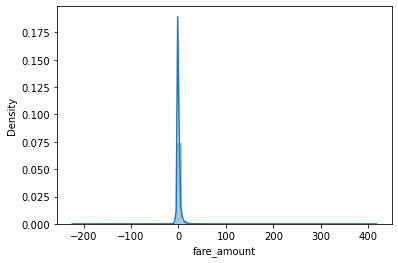

In [52]:
sns.distplot((y_test-prediction),bins=50)

In [53]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))


MAE: 2.324667847830843
MSE: 25.35365362549474
RMSE: 5.035241168553373


In [54]:
lm.score(X_test,y_test)

0.7231667720736019

In [55]:
lm.predict(X_test)

array([ 4.87078347,  5.12263741,  9.31702944, ..., 11.25578415,
        6.85891526, 14.29448859])

In [56]:
p=lm.predict(df_test)

In [57]:
df_test['fare_price']=p

In [58]:
df_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip,snow_season,trip_distance,fare_price
0,-73.973320,40.763805,-73.981430,40.743835,1,27,1,2015,1,13,0,0,1,2.320991,10.668766
1,-73.986862,40.719383,-73.998886,40.739201,1,27,1,2015,1,13,0,0,1,2.423802,11.561429
2,-73.982524,40.751260,-73.979654,40.746139,1,8,10,2011,5,11,0,0,0,0.618182,5.804791
3,-73.981160,40.767807,-73.990448,40.751635,1,1,12,2012,5,21,0,0,0,1.959671,8.230832
4,-73.966046,40.789775,-73.988565,40.744427,1,1,12,2012,5,21,0,0,0,5.382833,15.049630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,10,5,2015,6,12,0,0,0,2.124110,9.689558
9910,-73.945511,40.803600,-73.960213,40.776371,6,12,1,2015,0,17,0,1,1,3.268511,11.944148
9911,-73.991600,40.726608,-73.789742,40.647011,6,19,4,2015,6,20,0,1,0,19.217032,48.315715
9912,-73.985573,40.735432,-73.939178,40.801731,6,31,1,2015,5,1,1,0,1,8.339644,21.807266


In [59]:
lm.predict([[-73.973320,40.763805,-73.981430,40.743835,1,27,1,2015,1,13,0,0,1,2.320991]])

array([10.66878052])